In [104]:
# Import all libraries
import os
import math
import time
import numpy as np
import pandas as pd
try:
  import yfinance as yf
except:
  !pip install yfinance
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import norm
from itertools import product
import matplotlib.pyplot as plt
from numpy.random import seed
from numpy.random import rand
import statsmodels.formula.api as smf
from IPython.display import clear_output
from datetime import date, timedelta, datetime

In [105]:
# Define categories and list of tickers
financial_tickers = ['JPM', 'WFC', 'BAC', 'C', 'GS', 'USB','MS', 'KEY', 'PNC', 'COF', 'AXP', 'PRU', 'SCHW', 'BLK', 'VTI']
non_financial_tickers = ['KR', 'PFE', 'XOM', 'WMT', 'DAL', 'CSCO', 'AAPL', 'EQIX', 'DUK', 'NFLX', 'GE', 'APA', 'F', 'REGN', 'CMS']
tickers = {"financial": ['JPM', 'WFC', 'BAC', 'C', 'GS', 'USB','MS', 'KEY', 'PNC', 'COF', 'AXP', 'PRU', 'SCHW', 'BLK', 'VTI'],
              "non-financial": ['KR', 'PFE', 'XOM', 'WMT', 'DAL', 'CSCO', 'AAPL', 'EQIX', 'DUK', 'NFLX', 'GE', 'APA', 'F', 'REGN', 'CMS']}

In [106]:
# Download historical data
start_date = "2008-09-01"
end_date = "2008-10-31"

In [107]:
len(tickers)

2

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

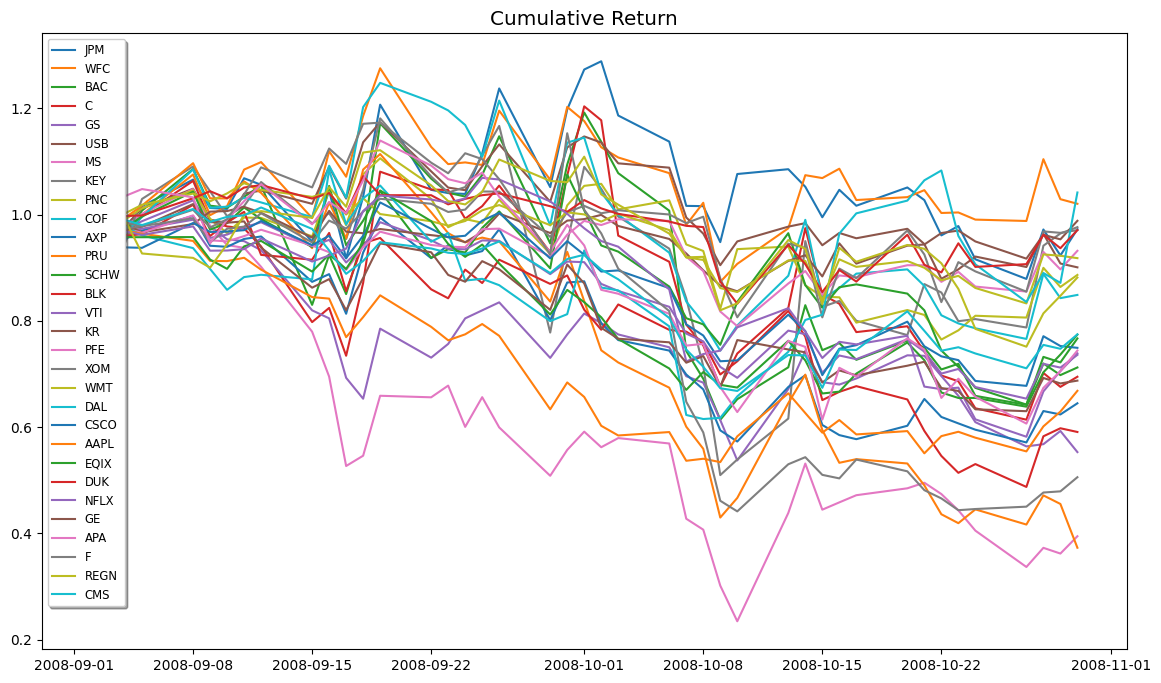

In [108]:
tickers = financial_tickers + non_financial_tickers
df = pd.DataFrame()
df_ret = pd.DataFrame()
for tick in tickers:
  price = yf.download(tick, start="2008-09-01", end="2008-10-31")
  plt.plot(price['Adj Close']/price['Adj Close'][0],label = tick)
  price = price.rename(columns ={'Adj Close':tick})
  price[tick+'ret'] = price[tick].pct_change()
  df = pd.concat([df, price[[tick]]], axis = 1)
  df_ret = pd.concat([df, price[[tick+'ret']]], axis = 1)
pdata = df.to_numpy()
pdata_dates = pd.to_datetime(price.index, format= '%Y-%m-%d')
legend = plt.legend(loc='upper left', shadow=True, fontsize='small')
title = 'Cumulative Return'
plt.title(title, fontsize='x-large')
fig = plt.gcf()
fig.set_size_inches(14, 8)
plt.show()

Let's examine data points at certain timestamps for each stock to gain significant insights into the overall trends and characteristics of our time series data.

We needed to know where the majority of the data points were, how spread out the data is around the mean, and whether there were any outliers, anomalies, or trends by observing the distribution of data points, central tendency, and data dispersion.

We also check for any indications of a skewed distribution or considerable variability in the data, specifically for Outliers, in order to determine appropriate scaling or normalization procedures to employ.

In [109]:
df.describe()

,JPM,WFC,BAC,C,GS,USB,MS,KEY,PNC,COF,...,CSCO,AAPL,EQIX,DUK,NFLX,GE,APA,F,REGN,CMS
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,...,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,27.488413,21.910208,22.729318,130.699649,98.153130,21.183707,18.073585,7.609937,45.944627,33.805523,...,14.089415,3.611133,51.571211,25.348300,3.830100,94.775019,73.409831,2.166095,19.778139,6.923694
std,2.462758,1.650279,4.424316,22.734913,17.401778,1.631083,6.650896,1.254921,4.446424,4.866597,...,1.783952,0.753996,7.785677,1.606797,0.619068,13.977498,13.893938,0.738829,1.930923,0.913858
min,23.127113,18.096989,15.542695,90.550095,68.984055,18.404158,6.992609,4.168500,37.174980,25.759418,...,11.000570,2.683116,40.076462,21.546297,2.562857,72.854378,50.847389,1.176320,15.460000,5.395478
25%,25.963585,20.723546,18.313938,110.312103,87.550732,20.090054,13.241580,6.804654,42.060801,29.614453,...,12.231212,2.964459,44.152363,24.331040,3.265715,82.243675,61.013861,1.353655,18.720000,6.024656
50%,27.202543,22.081638,23.951435,134.396988,95.474586,20.938166,16.614670,7.888982,47.452778,34.464123,...,14.897603,3.333787,50.966225,25.846596,4.105714,94.838127,77.953300,2.571352,19.590000,7.188038
75%,28.080050,22.765678,26.275305,147.365829,105.262886,22.319168,20.479379,8.528543,49.134300,36.819544,...,15.646237,4.236626,59.125788,26.675308,4.356429,106.487377,86.247726,2.822576,21.230000,7.662885
max,33.908424,26.431570,30.190670,177.549210,131.854385,24.573402,31.257238,9.661572,53.761745,43.215061,...,16.606825,5.048151,65.625519,27.757851,4.710000,117.949501,95.519836,3.127002,23.070000,8.185222


In [110]:
df = df.pct_change(axis=0) #Daily Returns
df

,JPM,WFC,BAC,C,GS,USB,MS,KEY,PNC,COF,...,CSCO,AAPL,EQIX,DUK,NFLX,GE,APA,F,REGN,CMS
Date,,,,,,,,,,,,,,,,,,,,,
2008-09-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-09-03,0.018466,-0.006409,0.030322,0.026164,0.013852,0.017918,0.021065,0.008730,0.009259,0.016474,...,-0.018526,0.004633,-0.009883,-0.012688,0.002270,0.001402,0.010720,0.013304,0.059281,-0.011756
2008-09-04,-0.045328,-0.043212,-0.071602,-0.066803,-0.040034,-0.039454,-0.043396,-0.062156,-0.018483,-0.051030,...,-0.044187,-0.034380,-0.033063,0.009930,-0.033646,-0.030451,0.023726,-0.039387,-0.065138,0.001487
2008-09-05,0.044579,0.051568,0.053267,0.042076,0.014543,0.034439,0.025286,0.088088,0.021168,0.031849,...,-0.000898,-0.006451,-0.000129,0.001157,-0.007030,0.006498,0.012724,0.004556,-0.064279,-0.009651
2008-09-08,0.049243,0.075640,0.077568,0.065549,0.039757,0.036652,0.046180,0.059368,0.033517,0.089913,...,0.049865,-0.014109,0.000258,0.032351,0.016521,0.043400,-0.014897,0.031746,-0.008915,0.030734
2008-09-09,-0.050061,-0.071216,-0.063634,-0.070866,-0.047487,-0.055391,-0.066328,-0.042940,-0.051185,-0.066284,...,-0.017116,-0.039514,-0.044253,0.012871,-0.046766,-0.033345,-0.083994,-0.032967,-0.020106,-0.024000
2008-09-10,-0.001773,0.017004,-0.003690,-0.010593,-0.025236,-0.006550,-0.036634,-0.044867,-0.027316,0.001758,...,0.000871,-0.000461,-0.019034,-0.012707,0.000348,-0.001066,0.047837,0.015909,0.049136,0.009687
2008-09-11,0.057107,0.067824,0.020371,-0.003747,-0.003554,0.056201,-0.005396,0.019108,0.030482,0.016674,...,0.002610,0.006860,0.047062,0.019586,0.002782,0.002492,0.034643,0.046980,0.059187,0.002952
2008-09-12,-0.011525,0.012999,0.020569,-0.034927,-0.017958,0.005648,-0.038233,0.044531,-0.000685,-0.008632,...,0.017788,-0.024304,0.011040,0.004391,0.021506,-0.050071,0.031006,0.049146,0.006317,0.014716


In [111]:
df.corr()

,JPM,WFC,BAC,C,GS,USB,MS,KEY,PNC,COF,...,CSCO,AAPL,EQIX,DUK,NFLX,GE,APA,F,REGN,CMS
JPM,1.000000,0.788109,0.840628,0.800970,0.457663,0.874267,0.305243,0.516242,0.831850,0.719848,...,0.682542,0.649592,0.637277,0.343693,0.529817,0.781706,0.494771,0.486592,0.558347,0.567140
WFC,0.788109,1.000000,0.830238,0.736665,0.507067,0.843000,0.429166,0.695693,0.745076,0.805570,...,0.648629,0.529282,0.564222,0.390883,0.378513,0.689120,0.529243,0.659981,0.541779,0.482436
BAC,0.840628,0.830238,1.000000,0.904035,0.661774,0.795648,0.539036,0.753169,0.653551,0.799046,...,0.710794,0.598602,0.628119,0.365083,0.538078,0.703995,0.579602,0.623457,0.541941,0.637231
C,0.800970,0.736665,0.904035,1.000000,0.623447,0.735774,0.550131,0.742449,0.616420,0.790941,...,0.636118,0.562382,0.607205,0.365736,0.474862,0.695934,0.514996,0.532483,0.518865,0.591418
GS,0.457663,0.507067,0.661774,0.623447,1.000000,0.395573,0.814934,0.595028,0.193895,0.487569,...,0.600028,0.457470,0.587596,0.404718,0.226109,0.309900,0.597171,0.500632,0.453065,0.594518
USB,0.874267,0.843000,0.795648,0.735774,0.395573,1.000000,0.359951,0.589451,0.864232,0.821943,...,0.691788,0.598812,0.629264,0.420874,0.459024,0.720043,0.552583,0.646821,0.546532,0.575619
MS,0.305243,0.429166,0.539036,0.550131,0.814934,0.359951,1.000000,0.531887,0.168172,0.492566,...,0.618103,0.517550,0.577916,0.572370,0.296235,0.246946,0.666601,0.590734,0.533809,0.637426
KEY,0.516242,0.695693,0.753169,0.742449,0.595028,0.589451,0.531887,1.000000,0.424827,0.730262,...,0.459449,0.395186,0.373145,0.218169,0.167087,0.494956,0.407391,0.564468,0.405321,0.456176
PNC,0.831850,0.745076,0.653551,0.616420,0.193895,0.864232,0.168172,0.424827,1.000000,0.669605,...,0.584305,0.602821,0.536752,0.402260,0.437082,0.738852,0.411806,0.511093,0.470773,0.435344
COF,0.719848,0.805570,0.799046,0.790941,0.487569,0.821943,0.492566,0.730262,0.669605,1.000000,...,0.743121,0.610805,0.638252,0.435241,0.499263,0.700032,0.608165,0.695949,0.609717,0.642969


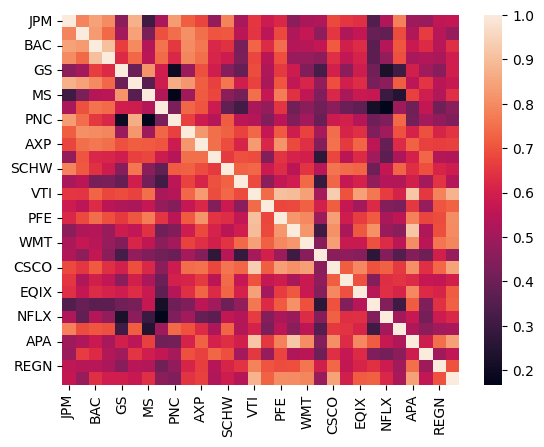

In [112]:
sns.heatmap(df.corr());

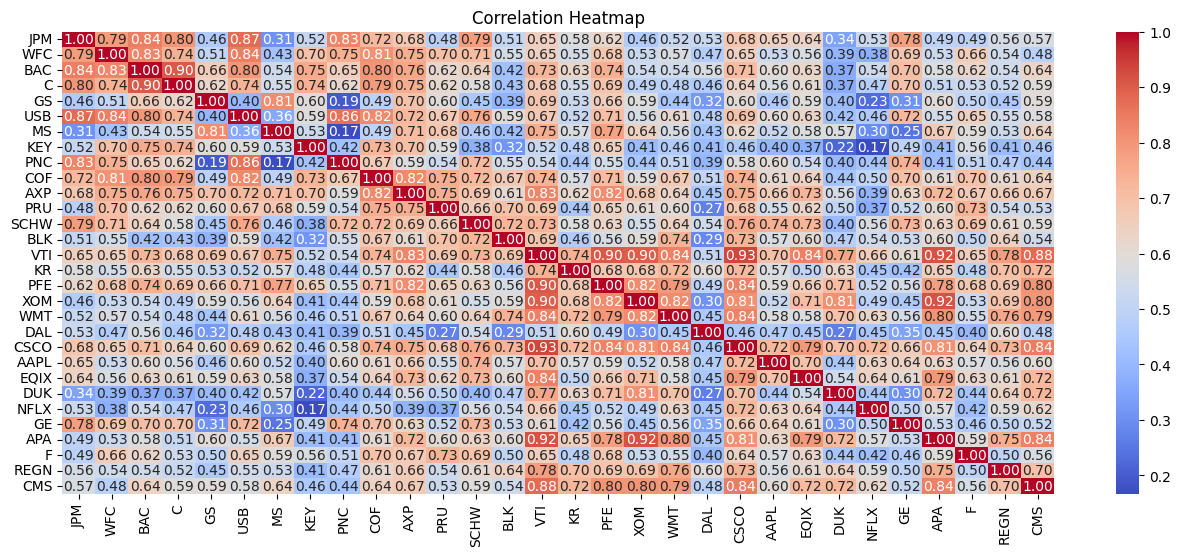

In [113]:
plt.figure(figsize=(16, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", xticklabels=df.columns, yticklabels=df.columns)
plt.title('Correlation Heatmap')
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

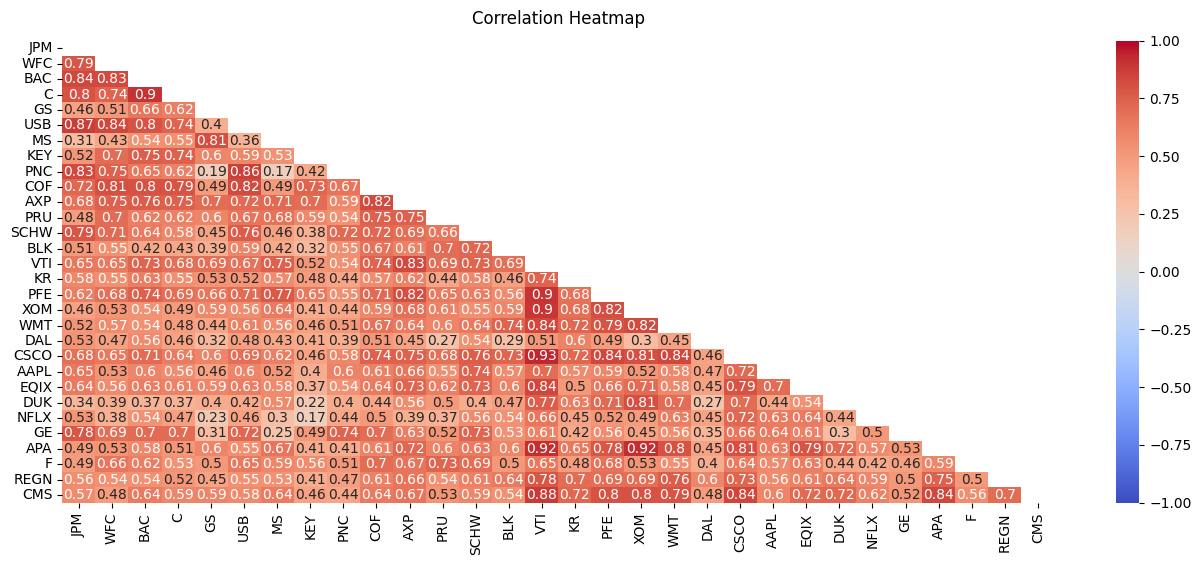

In [114]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df.corr()))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, cmap='coolwarm', annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

To properly convey our data's linkages and patterns, we will do a clustering analysis by applying a triangular mask to the heatmap, focusing on the lower triangle and lowering row clustering by adapting our code to reflect one decimal place in the heatmap annotation.


<Figure size 1600x600 with 0 Axes>

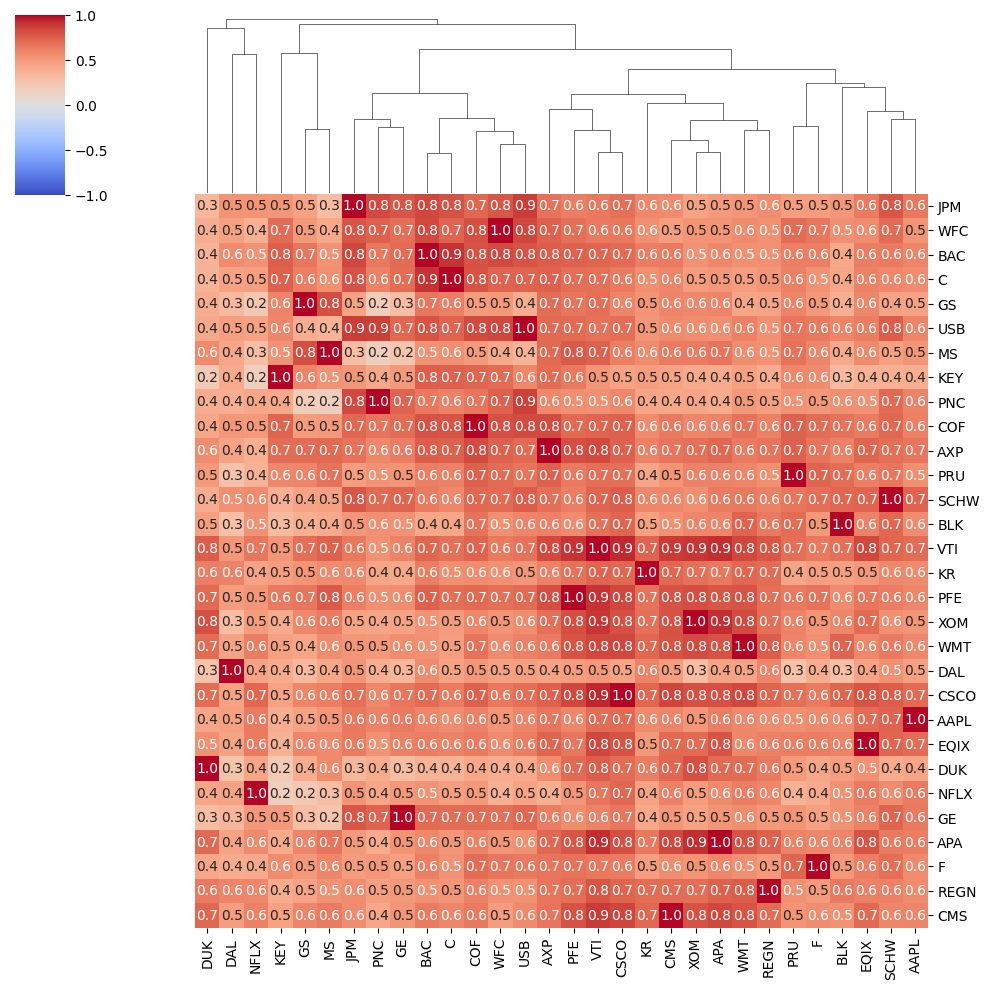

In [115]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df.corr()))
heatmap = sns.clustermap(df.corr(), row_cluster=False, vmin=-1, vmax=1, cmap='coolwarm', annot=True, fmt='.1f')

#Step 5
The UCB algorithm is an approach that balances the exploitation of currently estimated best actions and the exploration of potentially better but less known actions. Here's how it works in the context of the multi-armed bandit:

**Exploration and Exploitation**:

In the multi-armed bandit, each action is like an "arm" of a slot machine, and the goal is to maximize the total return by wisely selecting which arms to pull.

Exploitation involves choosing the action that appears to be the best based on current estimates.

Exploration involves pulling other arms to discover if there might be a potentially better action.

**Upper-Confidence Bound (UCB)**:

The UCB algorithm introduces an exploration term based on an estimation of the uncertainty associated with each action.

The UCB formula $A_t = \arg\max_a \left(Q_t(a) + c \sqrt{\frac{\ln t}{N_t(a)}}\right)$ favors actions with high estimates ($Q_t(a)$) while increasing the exploration priority for less frequently chosen actions ($N_t(a)$).

The parameter $c$ controls the degree of exploration. A higher value of $c$ encourages more aggressive exploration.

Adaptability and Learning:

The UCB algorithm adapts over time by adjusting the exploration term $c \sqrt{\frac{\ln t}{N_t(a)}}$ based on how often each action has been chosen.

The UCB algorithm adapts over time by adjusting the exploration term $c \sqrt{\frac{\ln t}{N_t(a)}}$ based on how often each action has been chosen.

**Results and Performance**:

The UCB algorithm is designed to maximize cumulative returns over the long term.

By adjusting the trade-off between exploitation and exploration, it aims to find an optimal balance for selecting the most profitable actions.

**Stock Selection Problem**:

In the context of the stock selection problem, the UCB algorithm should demonstrate an ability to adapt to changes in the performance of actions over time.

In summary, the UCB algorithm in the multi-armed bandit framework employs a smart approach to exploit currently estimated best actions while continuing to explore other actions to discover new opportunities for high returns. This is achieved by dynamically adjusting the level of exploration based on the collected data.

#Step 6

This algorithm, based on the $\epsilon$-greedy concept in the context of multi-armed bandits, represents a practical approach to portfolio optimisation. In portfolio management, stocks are analogous to different investment options, and the agent, who chooses stocks sequentially, simulates an investor making decisions about which stocks to buy or sell.

The optimal_action function captures the trade-off between exploration (random choice) and exploitation (choosing the maximum action in terms of expected reward). This reflects the reality where an investor has to balance the exploration of new opportunities (potentially lucrative but lesser-known stocks) with the exploitation of current investments estimated as the best based on past returns. The reward_update function simulates the updating of stock value estimates based on actual returns, which is crucial for the continuous adjustment of the portfolio based on past performance. Thus, this algorithm offers a practical representation of the decision-making process in portfolio management by integrating the fundamental principles of exploration and exploitation for the optimisation of returns.

#STEP 7
**7a**

The algorithm used here, based on the $\epsilon$-greedy policy, is an essential approach to exploration-exploitation in reinforcement learning, particularly in the context of Monte Carlo methods. The $\epsilon$-greedy policy provides a balanced way of exploring the environment by randomly choosing an action with probability $\epsilon$, while exploiting the best known action with probability $1-\epsilon$. In this case, this translates into using departure exploration to randomly choose the initial state, ensuring that different parts of the environment are explored. In parallel, the $\epsilon$-greedy policy ensures that the agent prioritises known optimal actions, favouring the exploitation of information learned over time.


The implications of this policy are crucial to the agent's learning process. By encouraging exploration, $\epsilon$-greedy allows new possibilities to be discovered and avoids getting stuck in sub-optimal behaviours. This is particularly relevant when certain actions have not been sufficiently explored, as it allows the agent to gather more information to improve its value estimates. However, the choice of the $\epsilon$ parameter is decisive, as too high a value could lead to excessive exploration to the detriment of exploiting the potentially optimal actions already identified. In summary, the $\epsilon$-greedy policy is an essential strategy for balancing exploration and exploitation, thereby promoting effective learning in dynamic and complex environments.


**7b**

Considering a strategy that balances exploration and exploitation is essential in the context of adaptive portfolio management for several crucial reasons. First, financial markets are inherently dynamic and subject to unpredictable change. A strategy that balances exploration and exploitation allows an adaptive portfolio manager to navigate ever-changing financial environments with agility. By incorporating elements of exploration, the strategy can uncover new investment opportunities and adjust quickly to market conditions, thereby mitigating the risk associated with reliance on static models.

In addition, adaptive portfolio management requires informed decision-making based on up-to-date information. Continuous exploration allows data to be collected in real time, improving the accuracy of return and risk estimates. This is particularly crucial in a financial environment where new and unexpected information can have a significant impact. Consequently, the study of a balanced strategy between exploration and exploitation is a fundamental pillar in developing robust and adaptive portfolio management approaches, capable of adjusting rapidly to the complex and evolving dynamics of financial markets.

#STEP 8

As contained in the .doc file

#STEP 9

We will now implement the multi-armed bandit algorithms for the data.

In [116]:
class SM_GWP3:

    def __init__(self, start_date, end_date, ticker_list, file_path):
        self.df = pd.DataFrame()
        self.daily_return_model = pd.DataFrame()
        self.df_pct_change = pd.DataFrame()
        self.ticker = ticker_list
        self.start_date = start_date
        self.end_date = end_date
        self.file_path = file_path
        self.pdata = None
        self.pdata_dates = None
        self.HOLD = None
        self.optimal_avg = None
        self.reward_avg = None
        self.df_correlation_matrix = pd.DataFrame()

    def get_data(self):
        try:
            if not os.path.exists(self.file_path):
                if type(self.ticker)!=list:
                  self.ticker = [self.ticker]
                for tick in self.ticker:
                    try:
                        ydata = yf.download(tick, start=self.start_date, end=self.end_date, interval="1d")
                        ydata.index = ydata.index.date
                        self.df[tick] = ydata['Adj Close']
                    except Exception as err:
                        print(err)
                print("Saving to the file")
                self.df.dropna(inplace=True)
                self.df.to_csv(self.file_path, index=True)
            else:
                print("Reading from file")
                self.df = pd.read_csv(self.file_path, index_col = [0])
                if len(self.df.columns) != len(self.ticker):
                    os.remove(self.file_path)
                    time.sleep(5)
                    self.df = pd.DataFrame()
                    self.get_data()

        except Exception as err:
            print(err)

    def daily_return(self):
        self.df_daily_return = self.df - self.df.shift(1)

    def pct_return(self):
        self.df_pct_change = self.df.pct_change(axis=0)

    def optimal_action(self, qvalue, eps):
        """
        Determines what is the action to take given a measure of past
        expected rewards across actions. With probability eps the action
        is not the greedy one
        """
        nactions = qvalue.shape[0]
        action_hat = np.where(qvalue == np.max(qvalue))

        if rand() <= eps:
            randnum = rand()
            for aa in range(nactions):
                if randnum < (aa + 1) / nactions:
                    break
        elif action_hat[0].shape[0] > 1:
            # Randomize action when ties
            randnum = rand()
            for aa in range(action_hat[0].shape[0]):
                if randnum < (aa + 1) / action_hat[0].shape[0]:
                    break
            aa = action_hat[0][aa]
        else:
            aa = np.argmax(qvalue)
        return aa

    def reward_update(self, action, reward, qvalue_old, alpha):
        qvalue_new = qvalue_old.copy()
        qvalue_new[action] = qvalue_old[action] + alpha * (reward - qvalue_old[action])
        return qvalue_new

    def bandit(self):
        EPSILON = 0.1
        ALPHA = 0.25
        NEPISODES = 1000
        self.HOLD = 1
        self.pdata = self.df.to_numpy()
        self.pdata_dates = pd.to_datetime(self.df.index)
        NK = self.pdata.shape[1]
        self.TMAX = self.pdata.shape[0] - self.HOLD
        # NEW PARAMETER
        UCB_WEIGHT = 1.0
        seed(1234)
        self.reward_avg = np.zeros((self.TMAX))
        self.optimal_avg = np.zeros((self.TMAX))
        reward_queue = np.zeros((self.HOLD,2))

        for run in range(NEPISODES):
            # Initialize q function and actions record
            qvalue = np.zeros((NK))
            qvalue_up = np.zeros((NK))
            nactions = np.zeros((NK))
            for tt in range(self.TMAX):
                aa_opt = self.optimal_action(qvalue_up, EPSILON)
                nactions[aa_opt] += 1
                # Compute reward as return over holding period
                reward_queue[self.HOLD-1,0] = (self.pdata[tt+self.HOLD,aa_opt]-self.pdata[tt,aa_opt])/self.pdata[tt,aa_opt]
                reward_queue[self.HOLD-1,1] = aa_opt
                # Update Q function using action chosen HOLD days before
                qvalue = self.reward_update(int(reward_queue[0,1]), reward_queue[0,0], qvalue, ALPHA)
                # Upper-confidence adjustment
                qvalue_up = np.zeros((NK))
                for aa in range(NK):
                    # If an action has not been visited simply give it the maximum value across actions
                    if nactions[aa] == 0:
                        qvalue_up[aa] = np.max(qvalue_up) + 1.0
                    else:
                        qvalue_up[aa] = qvalue_up[aa] + UCB_WEIGHT * np.sqrt(np.log(tt+1)/nactions[aa])
                    reward_queue[0:self.HOLD-1,:] = reward_queue[1:self.HOLD,:]
                    self.reward_avg[tt] += reward_queue[self.HOLD-1,0]/NEPISODES
                    self.optimal_avg[tt] += (aa_opt==np.argmax((self.pdata[tt+self.HOLD,:]-self.pdata[tt,:])/self.pdata[tt,:]))/NEPISODES

    def e_greedy(self):
        EPSILON = 0.1
        ALPHA = 0.25
        NEPISODES = 1000
        self.HOLD = 1
        self.pdata = self.df.to_numpy()
        self.pdata_dates = pd.to_datetime(self.df.index)
        NK = self.pdata.shape[1]
        self.TMAX = self.pdata.shape[0] - self.HOLD
        # NEW PARAMETER
        seed(1234)
        self.reward_avg = np.zeros((self.TMAX))
        self.optimal_avg = np.zeros((self.TMAX))
        reward_queue = np.zeros((self.HOLD,2))

        for run in range(NEPISODES):
            # Initialize q function and actions record
            qvalue = np.zeros((NK))
            nactions = np.zeros((NK))
            for tt in range(self.TMAX):
                aa_opt = self.optimal_action(qvalue, EPSILON)
                nactions[aa_opt] += 1
                # Compute reward as return over holding period
                reward_queue[self.HOLD-1,0] = (self.pdata[tt+self.HOLD,aa_opt]-self.pdata[tt,aa_opt])/self.pdata[tt,aa_opt]
                reward_queue[self.HOLD-1,1] = aa_opt
                # Update Q function using action chosen HOLD days before
                qvalue = self.reward_update(int(reward_queue[0,1]), reward_queue[0,0], qvalue, ALPHA)
                reward_queue[0:self.HOLD-1,:] = reward_queue[1:self.HOLD,:]
                self.reward_avg[tt] += reward_queue[self.HOLD-1,0]/NEPISODES
                self.optimal_avg[tt] += (aa_opt==np.argmax((self.pdata[tt+self.HOLD,:]-self.pdata[tt,:])/self.pdata[tt,:]))/NEPISODES

    def plot_optimal_actons(self):
        plt.plot(self.pdata_dates[self.HOLD:self.pdata.shape[0]], self.optimal_avg)
        plt.title("Frequency of optimal action", fontsize="x-large")
        fig = plt.gcf()
        fig.set_size_inches(12, 3)
        plt.show();

    def plot_average_max_reward(self):
        plt.plot(self.pdata_dates[self.HOLD:self.pdata.shape[0]], \
             np.max((self.pdata[self.HOLD:self.pdata.shape[0],:]\
                     -self.pdata[0:self.TMAX,:])/self.pdata[0:self.TMAX,:],axis=1),label="Max returns")
        plt.plot(self.pdata_dates[self.HOLD:self.pdata.shape[0]], self.reward_avg, label="Average returns")
        legend = plt.legend(loc="upper right", shadow=True)
        fig = plt.gcf()
        fig.set_size_inches(12, 3)

        # Display the first plot
        plt.show()

        plt.plot(self.pdata_dates[self.HOLD:self.pdata.shape[0]], \
             np.mean((self.pdata[self.HOLD:self.pdata.shape[0],:]-self.pdata[0:self.TMAX,:])/self.pdata[0:self.TMAX], axis=1),\
                    label="Average return")
        plt.plot(self.pdata_dates[self.HOLD:self.pdata.shape[0]], self.reward_avg, label="Average reward")
        legend = plt.legend(loc="upper right", shadow=True)
        fig = plt.gcf()
        fig.set_size_inches(12, 3)

        # Display the second plot
        plt.show()

        # Average frequency of optimal action
        print(np.mean(self.optimal_avg))
        # Average annualized return from holding the equally-weighted portfolio
        print(
            (
                1 + np.mean(
                    (self.pdata[self.HOLD:self.pdata.shape[0],:] - self.pdata[0:self.TMAX,:]) / self.pdata[0:self.TMAX, :]
                )
                )
                ** (250 / self.HOLD) -1,
                np.sqrt(250 /self.HOLD)
                * np.std(
                    np.mean(
                    (
                            self.pdata[self.HOLD : self.pdata.shape[0],:]
                            - self.pdata[0:self.TMAX, :]) / self.pdata[0:self.TMAX, :],
                    axis=1,
                    )
            ),
        )
        print((1+np.mean(self.reward_avg)) ** (250 / self.HOLD) - 1, np.sqrt(250 / self.HOLD) * np.std(self.reward_avg))

    def plot_cum_return(self):
        return_cumulative = np.zeros((self.TMAX+1, 2))
        return_cumulative[0,0] = 1
        return_cumulative[0,1] = 1
        for tt in range(1, self.TMAX+1):
            return_cumulative[tt,0] = return_cumulative[tt-1,0] * ( 1 + self.reward_avg[tt-1] )
            rmean = np.mean((self.pdata[tt+self.HOLD-1,:]-self.pdata[tt-1,:])/self.pdata[tt-1,:])
            return_cumulative[tt,1] = return_cumulative[tt-1,1] * ( 1 + rmean )
        plt.plot(self.pdata_dates[self.HOLD-1:self.pdata.shape[0]], return_cumulative[:,0], label='Cumulative return Bandit')
        plt.plot(self.pdata_dates[self.HOLD-1:self.pdata.shape[0]], return_cumulative[:,1], label='Cumulative return Average')
        legend = plt.legend(loc='upper left', shadow=True)
        fig = plt.gcf()
        fig.set_size_inches(12, 3)
        plt.show()

    def correlation_matrix(self):
        self.df_correlation_matrix = self.df_pct_change.corr()

    def heatmap(self):
        sns.heatmap(self.df_correlation_matrix);

In [117]:
financial_institute = ["JPM", "WFC", "BAC", "C", "GS", "USB", "MS", "KEY", "PNC", "COF", "AXP", "PRU", "SCHW", "BLK", "VTI"]
non_financial_institute = ["KR", "PFE", "XOM", "WMT", "DAL", "CSCO", "AAPL", "EQIX", "DUK", "NFLX", "GE", "APA", "F", "REGN", "CMS"]
all = financial_institute + non_financial_institute
print(all)
financial_institute.extend(non_financial_institute)

['JPM', 'WFC', 'BAC', 'C', 'GS', 'USB', 'MS', 'KEY', 'PNC', 'COF', 'AXP', 'PRU', 'SCHW', 'BLK', 'VTI', 'KR', 'PFE', 'XOM', 'WMT', 'DAL', 'CSCO', 'AAPL', 'EQIX', 'DUK', 'NFLX', 'GE', 'APA', 'F', 'REGN', 'CMS']


In [118]:
model = SM_GWP3(
    "2008-09-01",
    "2008-10-31",
    all,
    "data.csv"
)
model.get_data()

Reading from file


In [119]:
model.df.head()

,JPM,WFC,BAC,C,GS,USB,MS,KEY,PNC,COF,...,CSCO,AAPL,EQIX,DUK,NFLX,GE,APA,F,REGN,CMS
2008-09-02,26.318295,20.726868,25.329132,147.520264,128.428452,20.938166,29.834166,8.181169,48.617935,34.633736,...,16.237631,5.024870,62.786736,25.891396,4.405714,115.678932,83.842987,2.665931,20.580000,8.078379
2008-09-03,26.804285,20.594034,26.097155,151.380035,130.207489,21.313335,30.462627,8.252594,49.068100,35.204285,...,15.936810,5.048151,62.166222,25.562897,4.415714,115.841118,84.741768,2.701397,21.799999,7.983408
2008-09-04,25.589293,19.704128,24.228556,141.267380,124.994789,20.472448,29.140667,7.739644,48.161152,33.407825,...,15.232612,4.874598,60.110798,25.816725,4.267143,112.313614,86.752319,2.594997,20.379999,7.995282
2008-09-05,26.730036,20.720224,25.519148,147.211395,126.812645,21.177505,29.877506,8.421412,49.180645,34.471821,...,15.218934,4.843153,60.103073,25.846596,4.237143,113.043434,87.856163,2.606820,19.070000,7.918119
2008-09-08,28.046301,22.287510,27.498611,156.860901,131.854385,21.953701,31.257238,8.921371,50.829018,37.571274,...,15.977832,4.774821,60.118603,26.682766,4.307143,117.949501,86.547340,2.689576,18.900000,8.161477


In [120]:
model.daily_return()

In [121]:
model.daily_return_model.head()

""


In [122]:
model.pct_return()

In [123]:
model.df_pct_change.head()

,JPM,WFC,BAC,C,GS,USB,MS,KEY,PNC,COF,...,CSCO,AAPL,EQIX,DUK,NFLX,GE,APA,F,REGN,CMS
2008-09-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-09-03,0.018466,-0.006409,0.030322,0.026164,0.013852,0.017918,0.021065,0.008730,0.009259,0.016474,...,-0.018526,0.004633,-0.009883,-0.012688,0.002270,0.001402,0.010720,0.013304,0.059281,-0.011756
2008-09-04,-0.045328,-0.043212,-0.071602,-0.066803,-0.040034,-0.039454,-0.043396,-0.062156,-0.018483,-0.051030,...,-0.044187,-0.034380,-0.033063,0.009930,-0.033646,-0.030451,0.023726,-0.039387,-0.065138,0.001487
2008-09-05,0.044579,0.051568,0.053267,0.042076,0.014543,0.034439,0.025286,0.088088,0.021168,0.031849,...,-0.000898,-0.006451,-0.000129,0.001157,-0.007030,0.006498,0.012724,0.004556,-0.064279,-0.009651
2008-09-08,0.049243,0.075640,0.077568,0.065549,0.039757,0.036652,0.046180,0.059368,0.033517,0.089913,...,0.049865,-0.014109,0.000258,0.032351,0.016521,0.043400,-0.014897,0.031746,-0.008915,0.030734


#Step 9(c)

In [124]:
model.bandit()

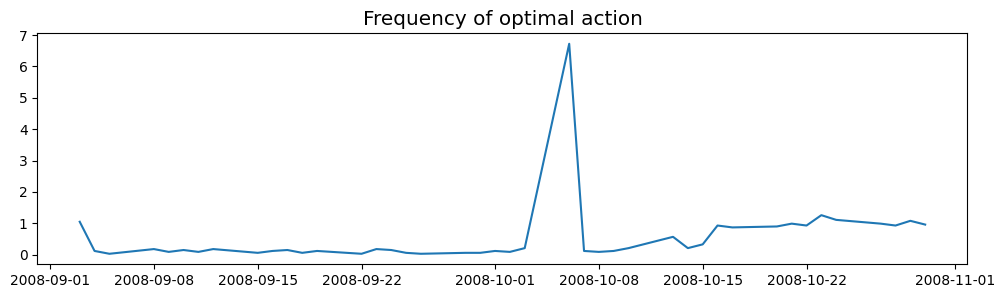

In [125]:
model.plot_optimal_actons()

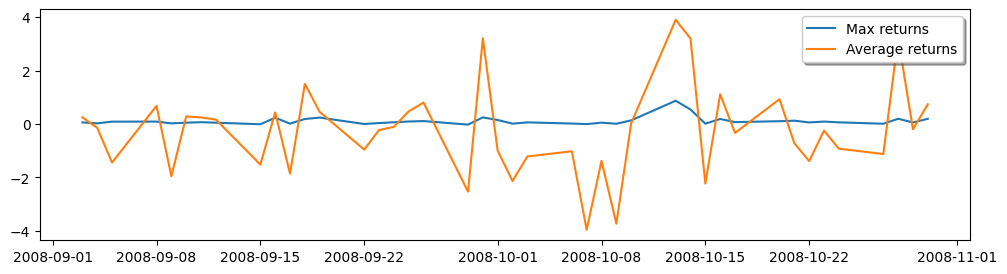

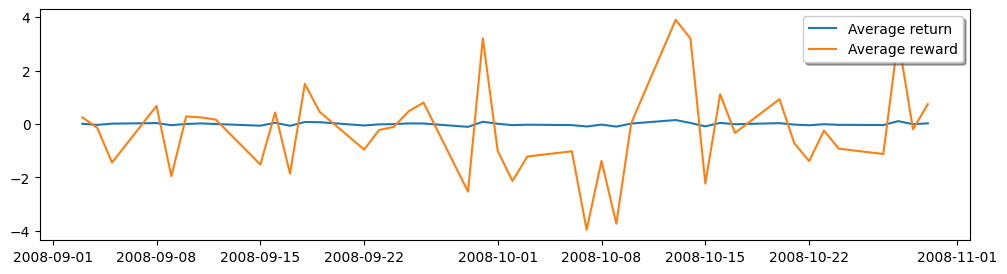

0.5407142857142985
-0.6179802163269981 0.8513046145806675
-1.0 26.54183735321816


In [126]:
model.plot_average_max_reward()

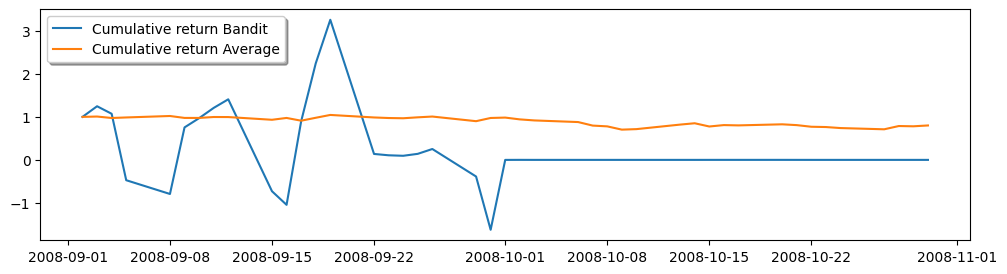

In [127]:
model.plot_cum_return()

In [128]:
model.e_greedy()

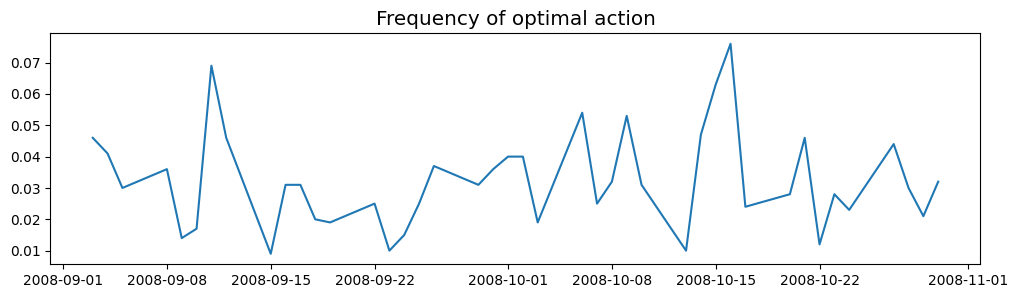

In [129]:
model.plot_optimal_actons()

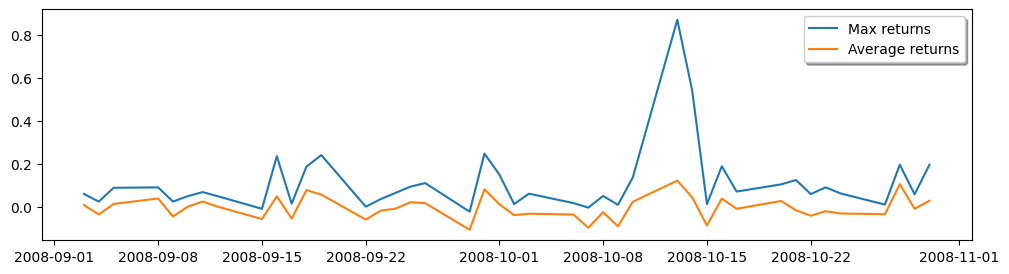

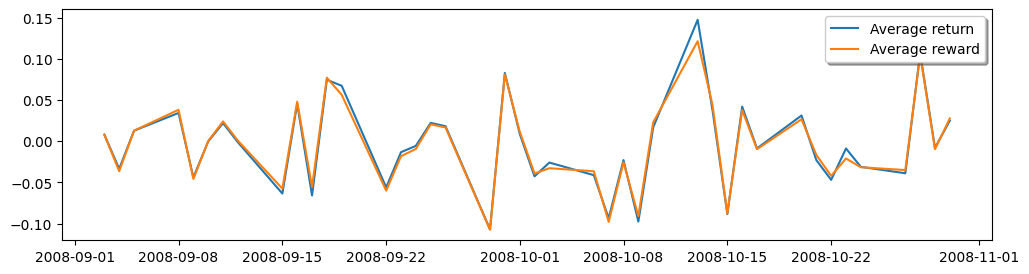

0.032523809523809545
-0.6179802163269981 0.8513046145806675
-0.6647732802781989 0.8152279842869269


In [130]:
model.plot_average_max_reward()

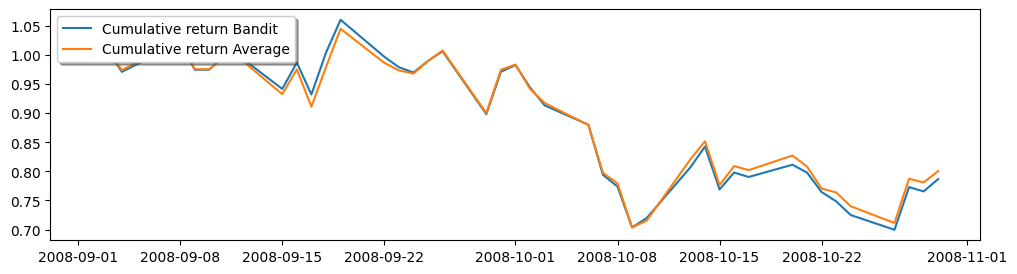

In [131]:
model.plot_cum_return()

#Step 10, Covid

Using the same 30 stocks, we applied the same process for the period ( March 1, 2020 to April 30, 2020).

See the other ipynb file marked "SM_622_GWP3_2020.ipynb"